# **Проект "Оценка прибыльности тарифных планов федерального оператора сотовой связи "Мегалайн"**

> ## Цель проекта:
*Анализ прибыльности актуальных тарифов в рамках корректировки рекламного бюджета компании на основании поведения клиентов*

> ## Задачи проекта:
- Подготовить данные для дальнейшего анализа
- Провести разведочный анализ полученных данных
- Сформулировать нуль - и альтернативную гипотезу
- Осуществить проверку гипотез
- Сформулировать вывод

___

<b>Оглавление:</b>
- <a id='1524'>Изучение общей информации</a>
- <a id='1553'>Заключение по Этапу 1</a>
- <a id='1554'>Предобработка данных</a>
- <a id='1555'>Предобработка датасетов</a>
- <a id='1578'>Количество сделанных звонков и израсходованных минут по месяцам</a>
- <a id='1582'>Количество сообщений, отправленных по месяцам</a>
- <a id='1586'>Объем израсходованного интернет-траффика по месяцам</a>
- <a id='1590'>Объединение модифицированных таблиц</a>
- <a id='1599'>Тепловая карта пропущенных значений</a>
- <a id='1603'>Вычисление помесячной выручки с каждого пользователя</a>
- <a id='1609'>Анализ данных</a>
- <a id='1612'>Создание гистограмм и вывод описательных статистик</a>
- <a id='1621'>Формулировка и проверка гипотез. Гипотеза 1</a>
- <a id='1628'>Формулировка и проверка гипотез. Гипотеза 2</a>
- <a id='1637'>Проверка гипотез при удалении выбросов</a>
- <a id='1654'>Общий вывод</a>

## *Этап 1. Изучение общей информации*

In [158]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy import stats as st
import warnings

In [68]:
# Читаем датасет с информацией о звонках
calls=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/calls.csv')

In [69]:
calls.sample(10)

,id,call_date,duration,user_id
138706,1354_114,2018-10-27,2.89,1354
32175,1079_546,2018-09-16,1.64,1079
5693,1015_413,2018-07-08,6.41,1015
138761,1354_169,2018-11-29,0.00,1354
90058,1225_318,2018-08-21,1.66,1225
39506,1098_334,2018-10-10,2.71,1098
4656,1012_130,2018-12-20,3.37,1012
159748,1394_153,2018-06-09,13.17,1394
160436,1395_97,2018-08-28,5.44,1395
27482,1067_392,2018-04-13,3.53,1067


In [70]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [71]:
print("Число строк в датафрейме calls:", calls.shape[0])
print("Число уникальных пользователей:", calls['user_id'].count())
print("Число дубликатов:", calls.duplicated().sum())

Число строк в датафрейме calls: 202607
Число уникальных пользователей: 202607
Число дубликатов: 0


In [72]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<span style=color:red><b>Пропусков нет; дубликатов нет; все значения уникальны. Присутствуют звонки с длительностью меньше минуты.</b></span>

Text(0.5, 1.0, 'Распределение длительности звонков')

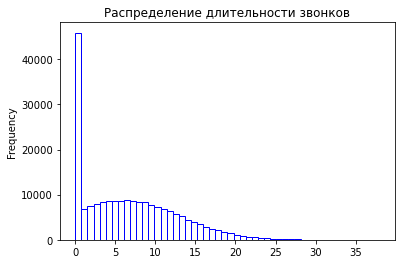

In [73]:
# Строим гистограмму распределения длительности звонков
calls['duration'].plot(kind='hist', ec='blue', bins=50, color='white')
plt.title('Распределение длительности звонков')

In [74]:
# Проверяем, имеются ли звонки с длительностью действительно меньше одной минуты?
calls.query('0<duration<0.5')

,id,call_date,duration,user_id
55,1000_55,2018-09-19,0.31,1000
65,1000_65,2018-10-28,0.34,1000
97,1000_97,2018-10-26,0.33,1000
122,1000_122,2018-10-07,0.13,1000
135,1000_135,2018-10-25,0.02,1000
...,...,...,...,...
202318,1498_111,2018-10-17,0.46,1498
202322,1498_115,2018-10-02,0.49,1498
202438,1499_51,2018-10-08,0.47,1499
202452,1499_65,2018-11-30,0.20,1499


<span style=color:red><b>Звонки с длительностью меньше минуты действительно есть. Однако, согласно условия задания, оператор всегда округляет вверх значения минут и мегабайтов. Это важно для дальнейших действий с данными: их можно округлять вверх (np.ceil)</b></span>

___

In [75]:
# Читаем датасет с информацией об интернет-сессиях
internet=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/internet.csv')

In [76]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
14793,14793,1052_164,457.25,2018-12-29,1052
3986,3986,1012_259,0.00,2018-09-06,1012
120623,120623,1407_155,0.00,2018-09-29,1407
92374,92374,1312_229,0.00,2018-09-27,1312
20439,20439,1068_189,182.94,2018-12-01,1068
86409,86409,1292_525,1028.68,2018-08-28,1292
50630,50630,1173_279,0.00,2018-11-12,1173
52760,52760,1177_283,0.00,2018-07-13,1177
6644,6644,1021_288,252.37,2018-05-23,1021
62630,62630,1213_12,0.00,2018-10-27,1213


In [77]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [78]:
print("Число строк в датафрейме internet:", internet.shape[0])
print("Число уникальных пользователей:", internet['user_id'].count())
print("Число дубликатов:", internet.duplicated().sum())

Число строк в датафрейме internet: 149396
Число уникальных пользователей: 149396
Число дубликатов: 0


In [79]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


<span style=color:red><b>Пропусков нет; дубликатов нет; все значения уникальны. Присутствуют интернет-сессии длительностью меньше минуты.</b></span>

Text(0.5, 1.0, 'Распределение длительности интернет-сессий')

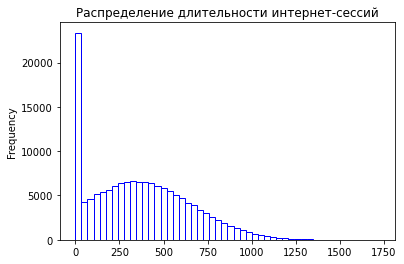

In [80]:
# Строим гистограмму распределения длительности звонков
internet['mb_used'].plot(kind='hist', ec='blue', bins=50, color='white')
plt.title('Распределение длительности интернет-сессий')

In [81]:
# Проверяем, имеются ли сессии с длительностью действительно меньше одной минуты?
internet.query('0<mb_used<0.5').head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
5229,5229,1015_237,0.41,2018-06-21,1015
8886,8886,1031_31,0.33,2018-12-16,1031
9929,9929,1033_309,0.17,2018-11-26,1033
11027,11027,1038_76,0.07,2018-12-30,1038
11399,11399,1040_22,0.07,2018-11-23,1040


<span style=color:red><b>Интернет-сессии длительностью меньше минуты действительно существуют. Такие значения также можно округлять вверх.</b></span>

___

In [82]:
# Читаем датасет с информацией о сообщениях
messages=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/messages.csv')

In [83]:
messages.sample(10)

,id,message_date,user_id
63444,1277_121,2018-09-30,1277
29925,1130_300,2018-04-19,1130
47581,1209_515,2018-07-07,1209
28323,1122_146,2018-11-30,1122
38412,1166_238,2018-08-20,1166
46194,1200_89,2018-11-29,1200
116039,1472_343,2018-02-16,1472
103551,1421_514,2018-02-27,1421
100060,1409_361,2018-12-16,1409
31558,1142_77,2018-04-03,1142


In [84]:
print("Число строк в датафрейме messages:", messages.shape[0])
print("Число уникальных пользователей:", messages['user_id'].count())
print("Число дубликатов:", messages.duplicated().sum())

Число строк в датафрейме messages: 123036
Число уникальных пользователей: 123036
Число дубликатов: 0


In [85]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


<span style=color:red><b>Пропусков нет; дубликатов нет; все значения уникальны.</b></span>

___

In [86]:
# Читаем датасет с информацией о тарифах
tariffs=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/tariffs.csv')

In [87]:
tariffs.sample(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
1,1000,30720,3000,1950,150,1,1,ultra
0,50,15360,500,550,200,3,3,smart


In [88]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [89]:
tariffs.duplicated().sum()

0

<span style=color:red><b>Очевидно, что ни пропусков, ни дубликатов в данном датасете быть не может.</b></span>

In [90]:
# Переименуем tariff_name и tariff
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [91]:
# Проверим
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


___

In [92]:
# Читаем датасет с информацией о пользователях
users=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/users.csv')

In [93]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [94]:
print("Число строк в датафрейме users:", users.shape[0])
print("Число уникальных пользователей:", users['user_id'].count())
print("Число дубликатов:", users.duplicated().sum())

Число строк в датафрейме users: 500
Число уникальных пользователей: 500
Число дубликатов: 0


In [95]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<span style=color:red><b>Пропуски (92.4%) в столбце churn_date.</b></span>

In [96]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

___

<span style=color:red><b>Заключение по Этапу 1:</b></span>
- В целом, данные в датасетах "чистые"
- Необходимо привести столбцы _date к единообразию
- В некоторых столбцах нужно изменить тип данных
- Необходимо округлить значения
- Необходимо проверить пропуски в датасете users
- Необходимо решить, как поступать с "нулевыми" звонками в датасете calls и "нулевыми" сессиями в internet

___

## *Этап 2. Предобработка данных*

### **Предобработка датасетов**

<span style=color:red><b>Предобработка датасетов: замена типов, округление</b></span>

In [97]:
# Исходные данные calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [98]:
# Приводим id к типу int
calls['id'] = calls['id'].astype('int')

In [99]:
# Приводим duration к типу int и округляем вверх как указано в задании
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [100]:
# Преобразованные данные
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         202607 non-null  int64 
 1   call_date  202607 non-null  object
 2   duration   202607 non-null  int64 
 3   user_id    202607 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.2+ MB


___

In [101]:
# Исходные данные internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [102]:
# Приводим к типу int
internet['id'] = internet['id'].astype('int')

In [103]:
# Округляем значения вверх
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [104]:
# Преобразованные данные
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    149396 non-null  int64 
 1   id            149396 non-null  int64 
 2   mb_used       149396 non-null  int64 
 3   session_date  149396 non-null  object
 4   user_id       149396 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 5.7+ MB


___

In [105]:
# Исходные данные messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [106]:
# Приводим к типу int
messages['id'] = messages['id'].astype('int')

In [107]:
# Преобразованные данные
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  int64 
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


___

<span style=color:red><b>Предобработка датасетов: работа со столбцами _date </b></span>

In [108]:
# Для calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
# Проверяем изменения в calls
calls.head(3)

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000


In [109]:
# Для internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
# Проверяем изменения в internet
internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,10000,113,2018-11-25,1000
1,1,10001,1053,2018-09-07,1000
2,2,10002,1198,2018-06-25,1000


In [110]:
# Для messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
# Проверяем изменения в messages
messages.head(3)

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000


In [111]:
# Для users
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
# Проверяем изменения в users
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


___

<span style=color:red><b>Предобработка датасетов: пропуски в датасете users </b></span>

In [112]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


В описании задания сказано, что если в столбце churn_date стоит NaN, это значит, что тариф действовал на момент выгрузки данных. Поскольку эти данные не будут использоваться для дальнейшей работы, их <span style=color:red>можно оставить без изменений</span>.

___

<span style=color:red><b>Предобработка датасетов: нулевые значения в calls и internet </b></span>

Text(0.5, 1.0, 'Распределение длительности звонков (после округления)')

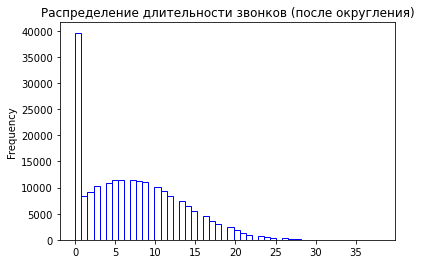

In [113]:
# Строим гистограмму распределения длительности звонков
calls['duration'].plot(kind='hist', ec='blue', bins=50, color='white')
plt.title('Распределение длительности звонков (после округления)')


In [114]:
# Есть ли "нулевые" звонки
calls.query('duration==0')

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
5,10005,2018-11-02,0,1000
6,10006,2018-10-18,0,1000
9,10009,2018-08-15,0,1000
...,...,...,...,...
202590,1499203,2018-12-03,0,1499
202592,1499205,2018-10-13,0,1499
202593,1499206,2018-12-26,0,1499
202594,1499207,2018-10-28,0,1499


Такие звонки есть и их много. Большое число "нулевых" звонков, то есть ситуаций, когда соединение по тем или иным причинам прерывалось до начала тарификации, не имеет никакого значения для исследования по причине того, что "нулевые" звонки не принимают участия в формировании выручки оператора. <span style=color:red>Следовательно, "нулевые" звонки можно удалить из выборки.</span>

In [115]:
# Удаляем "нулевые" звонки из выборки
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

Text(0.5, 1.0, 'Распределение звонков после удаления вызовов с "нулевой" длительностью')

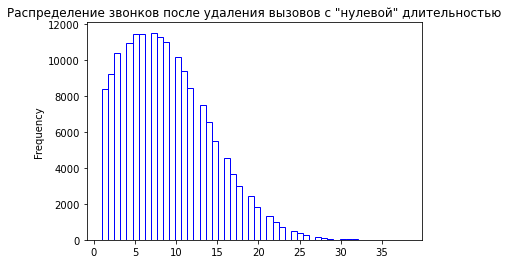

In [116]:
# Строим гистограмму проверки результатов удаления
calls['duration'].plot(kind='hist', ec='blue', bins=50, color='white')
plt.title('Распределение звонков после удаления вызовов с "нулевой" длительностью')

___

Text(0.5, 1.0, 'Распределение длительности интернет-сессий (после округления)')

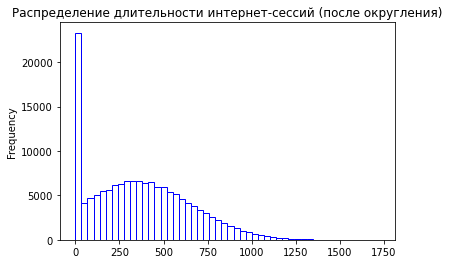

In [117]:
# Строим гистограмму распределения длительности интернет-сессий
internet['mb_used'].plot(kind='hist', ec='blue', bins=50, color='white')
plt.title('Распределение длительности интернет-сессий (после округления)')

In [118]:
# Есть ли "нулевые" сессии
internet.query('mb_used==0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,100011,0,2018-08-28,1000
38,38,100038,0,2018-11-27,1000
46,46,100046,0,2018-06-30,1000
67,67,100067,0,2018-06-16,1000
72,72,100072,0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499141,0,2018-12-11,1499
149381,149381,1499142,0,2018-11-01,1499
149383,149383,1499144,0,2018-11-27,1499
149386,149386,1499147,0,2018-10-21,1499


Интернет-сессии с "нулевой" продолжительностью также присутствуют в большом количестве. Возможно, сессия была установлена, но связь тут же оборвалась (у оператора "Мегалайн" явные технические проблемы и большие аппетиты). Такие сессии не имеют траффика и, <span style=color:red>следовательно, также могут быть удалены из выборки.</span>

In [119]:
# Удаляем "нулевые" звонки из выборки
internet['mb_used'] = internet['mb_used'].replace(0, np.NaN)
internet = internet.dropna()

Text(0.5, 1.0, 'Распределение интернет-сессий после удаления "нулевых"')

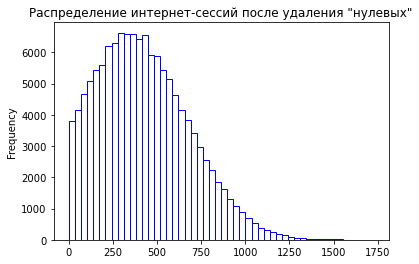

In [120]:
# Строим гистограмму проверки результатов удаления
internet['mb_used'].plot(kind='hist', ec='blue', bins=50, color='white')
plt.title('Распределение интернет-сессий после удаления "нулевых"')

___

### **Количество сделанных звонков и израсходованных минут по месяцам**

In [121]:
# Добавляем столбец 'month'
calls['month'] = calls['call_date'].dt.month

In [122]:
calls.head(5)

,id,call_date,duration,user_id,month
2,10002,2018-06-11,3.0,1000,6
3,10003,2018-09-21,14.0,1000,9
4,10004,2018-12-15,6.0,1000,12
7,10007,2018-08-22,19.0,1000,8
8,10008,2018-09-15,19.0,1000,9


In [129]:
# Группируем данные, формируем новые столбцы
calls_act = calls.groupby(['user_id', 'month'])\
.agg({'duration':'sum', 'id':'count'})\
.reset_index()\
.rename(columns={'duration':'month_duration','id':'calls_in_month'})

In [130]:
calls_act.head(5)

,user_id,month,month_duration,calls_in_month
0,1000,5,159.0,17
1,1000,6,172.0,28
2,1000,7,340.0,41
3,1000,8,408.0,42
4,1000,9,466.0,46


___


### **Количество сообщений, отправленных по месяцам**

In [131]:
# Добавляем столбец 'month'
messages['month']= messages['message_date'].dt.month

In [132]:
messages.head(5)

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


In [133]:
# Группируем данные, формируем новые столбцы
messages_act = messages.groupby(['user_id', 'month'])\
.agg({'id':'count'})\
.reset_index()\
.rename(columns={'id':'sms_in_month'})

In [134]:
messages_act.head(5)

,user_id,month,sms_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


___

### **Объем израсходованного интернет-траффика по месяцам**

In [135]:
# Добавляем столбец 'month'
internet['month']= internet['session_date'].dt.month

In [136]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,10000,113.0,2018-11-25,1000,11
1,1,10001,1053.0,2018-09-07,1000,9
2,2,10002,1198.0,2018-06-25,1000,6
3,3,10003,551.0,2018-08-22,1000,8
4,4,10004,303.0,2018-09-24,1000,9


In [137]:
# Группируем данные, формируем новые столбцы
internet_act = internet.groupby(['user_id','month'])\
.agg({'mb_used': 'sum'})\
.reset_index()\
.rename(columns={'mb_used': 'mb_in_month'})

In [138]:
internet_act.head(5)

,user_id,month,mb_in_month
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0


___

### **Объединение модифицированных таблиц**

In [139]:
# Объединяем таблицы calls_act и messages_act
data_3 = calls_act.merge(messages_act, on = ['user_id', 'month'], how = 'outer')

In [140]:
data_3.head(5)

,user_id,month,month_duration,calls_in_month,sms_in_month
0,1000,5,159.0,17.0,22.0
1,1000,6,172.0,28.0,60.0
2,1000,7,340.0,41.0,75.0
3,1000,8,408.0,42.0,81.0
4,1000,9,466.0,46.0,57.0


In [141]:
# Объединяем таблицы data_3 и internet_act
data_2 = data_3.merge(internet_act, on = ['user_id', 'month'], how = 'outer')

In [142]:
data_2.head(5)

,user_id,month,month_duration,calls_in_month,sms_in_month,mb_in_month
0,1000,5,159.0,17.0,22.0,2256.0
1,1000,6,172.0,28.0,60.0,23257.0
2,1000,7,340.0,41.0,75.0,14016.0
3,1000,8,408.0,42.0,81.0,14070.0
4,1000,9,466.0,46.0,57.0,14581.0


In [143]:
# Объединяем таблицы data_2 и users
data_1 = data_2.merge(users, on='user_id', how='left')

In [144]:
data_1.head(5)

,user_id,month,month_duration,calls_in_month,sms_in_month,mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,17.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,28.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,41.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,42.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,46.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [145]:
# Проводим заключительное объединение таблиц
data = data_1.merge(tariffs, on='tariff', how='left')

In [146]:
data.sample(10)

,user_id,month,month_duration,calls_in_month,sms_in_month,mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
471,1074,12,580.0,64.0,3.0,21923.0,68,NaN,Якутск,Андрей,Кравцов,2018-12-30,smart,50,15360,500,550,200,3,3
770,1122,12,458.0,52.0,117.0,10242.0,60,NaN,Воронеж,Иулиан,Булгаков,2018-11-07,ultra,1000,30720,3000,1950,150,1,1
970,1155,8,265.0,30.0,52.0,19476.0,71,NaN,Ставрополь,Александр,Чернов,2018-01-02,smart,50,15360,500,550,200,3,3
548,1087,12,349.0,42.0,38.0,15798.0,50,NaN,Санкт-Петербург,Гелена,Абалакова,2018-10-03,smart,50,15360,500,550,200,3,3
441,1068,11,433.0,52.0,28.0,25099.0,34,NaN,Москва,Ким,Демьянов,2018-07-16,smart,50,15360,500,550,200,3,3
1360,1217,2,72.0,8.0,6.0,3175.0,42,NaN,Ульяновск,Ермолай,Сазонов,2018-02-23,smart,50,15360,500,550,200,3,3
2017,1323,9,499.0,56.0,60.0,22882.0,67,NaN,Челябинск,Эсмеральда,Носкова,2018-08-02,smart,50,15360,500,550,200,3,3
623,1099,10,440.0,54.0,56.0,16219.0,67,NaN,Тольятти,Аюна,Сергеева,2018-03-16,ultra,1000,30720,3000,1950,150,1,1
718,1115,11,437.0,50.0,32.0,10282.0,71,NaN,Москва,Рашид,Толкачев,2018-07-28,smart,50,15360,500,550,200,3,3
2123,1340,1,25.0,2.0,NaN,2211.0,50,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart,50,15360,500,550,200,3,3


In [147]:
# Проверяем объединенный датасет на наличие пропусков
data.isnull().sum()

user_id                     0
month                       0
month_duration             46
calls_in_month             46
sms_in_month              497
mb_in_month                13
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

<AxesSubplot:>

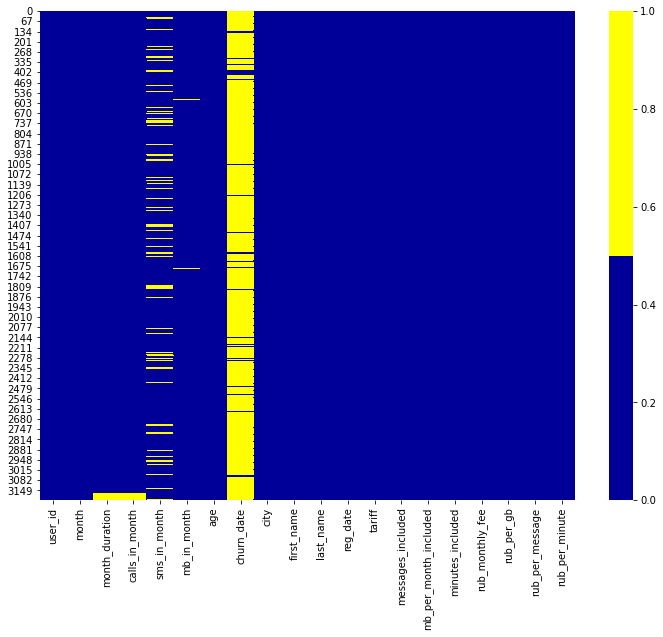

In [148]:
# Для наглядности создадим тепловую карту пропущенных значений
plt.figure(figsize=(12, 9))
cols = data.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [150]:
# Заполняем пропуски
data['sms_in_month'] = data['sms_in_month'].fillna(0)
data['mb_in_month'] = data['mb_in_month'].fillna(0)
data['month_duration'] = data['month_duration'].fillna(0)
data['calls_in_month'] = data['calls_in_month'].fillna(0)

In [151]:
# Проверяем снова
data.isnull().sum()

user_id                     0
month                       0
month_duration              0
calls_in_month              0
sms_in_month                0
mb_in_month                 0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [152]:
data.duplicated().sum()

0

___

### **Вычисление помесячной выручки с каждого пользователя**

In [153]:
# Создаем функцию для вычисления выручки по категориям
# Значение mbs округляем вверх (цена указана за гигабайт)
def over_tariff(row):
    sms = (row['sms_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_in_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total       
        

In [154]:
data.head()

,user_id,month,month_duration,calls_in_month,sms_in_month,mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,17.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,28.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,41.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,42.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,46.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [155]:
# Добавляем столбец в датасет
data['over_tariff'] = data.apply(lambda x: over_tariff(x), axis=1)

In [156]:
data['revenue'] = data['rub_monthly_fee'] + data['over_tariff']

In [157]:
data.sort_values(by='revenue').sample(10)

,user_id,month,month_duration,calls_in_month,sms_in_month,mb_in_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_tariff,revenue
710,1114,9,406.0,39.0,0.0,10704.0,53,NaN,Пермь,Маргарита,...,smart,50,15360,500,550,200,3,3,0.0,550.0
2375,1379,8,537.0,70.0,81.0,10956.0,39,NaN,Москва,Нелли,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1652,1266,7,136.0,16.0,13.0,8338.0,32,NaN,Калуга,Тала,...,smart,50,15360,500,550,200,3,3,0.0,550.0
1904,1304,11,435.0,48.0,65.0,34924.0,68,NaN,Владимир,Илья,...,ultra,1000,30720,3000,1950,150,1,1,616.0,2566.0
2704,1426,11,464.0,52.0,50.0,25292.0,56,NaN,Оренбург,Арина,...,smart,50,15360,500,550,200,3,3,1940.0,2490.0
60,1007,11,580.0,67.0,21.0,16390.0,65,NaN,Москва,Юна,...,smart,50,15360,500,550,200,3,3,442.0,992.0
2785,1436,9,406.0,47.0,24.0,22592.0,75,NaN,Москва,Радим,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
368,1057,11,643.0,65.0,30.0,20497.0,43,NaN,Москва,Динара,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
488,1078,7,1075.0,130.0,0.0,22452.0,70,NaN,Волгоград,Харитон,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3180,1106,8,0.0,0.0,25.0,19105.0,67,NaN,Калуга,Исаак,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0


<span style=color:red><b>Результаты Этапа 2:</b></span>
- Данные приведены к единому типу
- Проведено округление данных согласно условиям выполнения проекта
- NaN в столбце churn_date оставлены без изменений, поскольку не влияют на дальнейший анализ данных
- "Нулевые" значния в calls и internet удалены, поскольку не принимают участия в формировании выручки оператора
- Подсчитано количество сделанных звонков и израсходованных минут по месяцам
- Подсчитано количество сообщений, отправленных по месяцам
- Посчитан объем израсходованного интернет-траффика по месяцам
- Произведено объединение модифицированных таблиц
- Произведен рассчет помесячной выручки с каждого пользователя

___

## *Этап 3. Анализ данных*

In [159]:
warnings.filterwarnings('ignore')

### **Создание диаграмм размаха**

<b>Создадим функцию для построения диаграммы размаха по количеству звонков, смс и интернет-траффику, исходя из тарифных планов. Можно задать границы выбросов по 2 и 98 квантилям, а также по стандартному межквартильному размаху (1.5), для того, чтобы посмотреть, при каком параметре whis отбрасывается меньше аномалий (фильтрация данных происходит корректней).</b>

In [161]:
def plot_box(whis):
    column_list = ['month_duration', 'sms_in_month', 'mb_in_month']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(50,15))

    for r in range(rows):
        for c in range(cols):
            ax = data.boxplot(column=column_list[column_list_counter], by='tariff', fontsize=40, ax=axes[c],
                                         boxprops=dict(linestyle='-', linewidth=3),
                                         medianprops=dict(linestyle='-', linewidth=3),
                                         whiskerprops=dict(linestyle='-', linewidth=3),
                                         capprops=dict(linestyle='-', linewidth=3),
                                         notch=True, whis=whis)
            ax.set_title(column_list[column_list_counter])
            ax.title.set_size(40)
            ax.set_xlabel('')
            plt.suptitle('Диаграммы размаха с whis = {}'.format(whis), y=1, fontsize=40)
            column_list_counter += 1

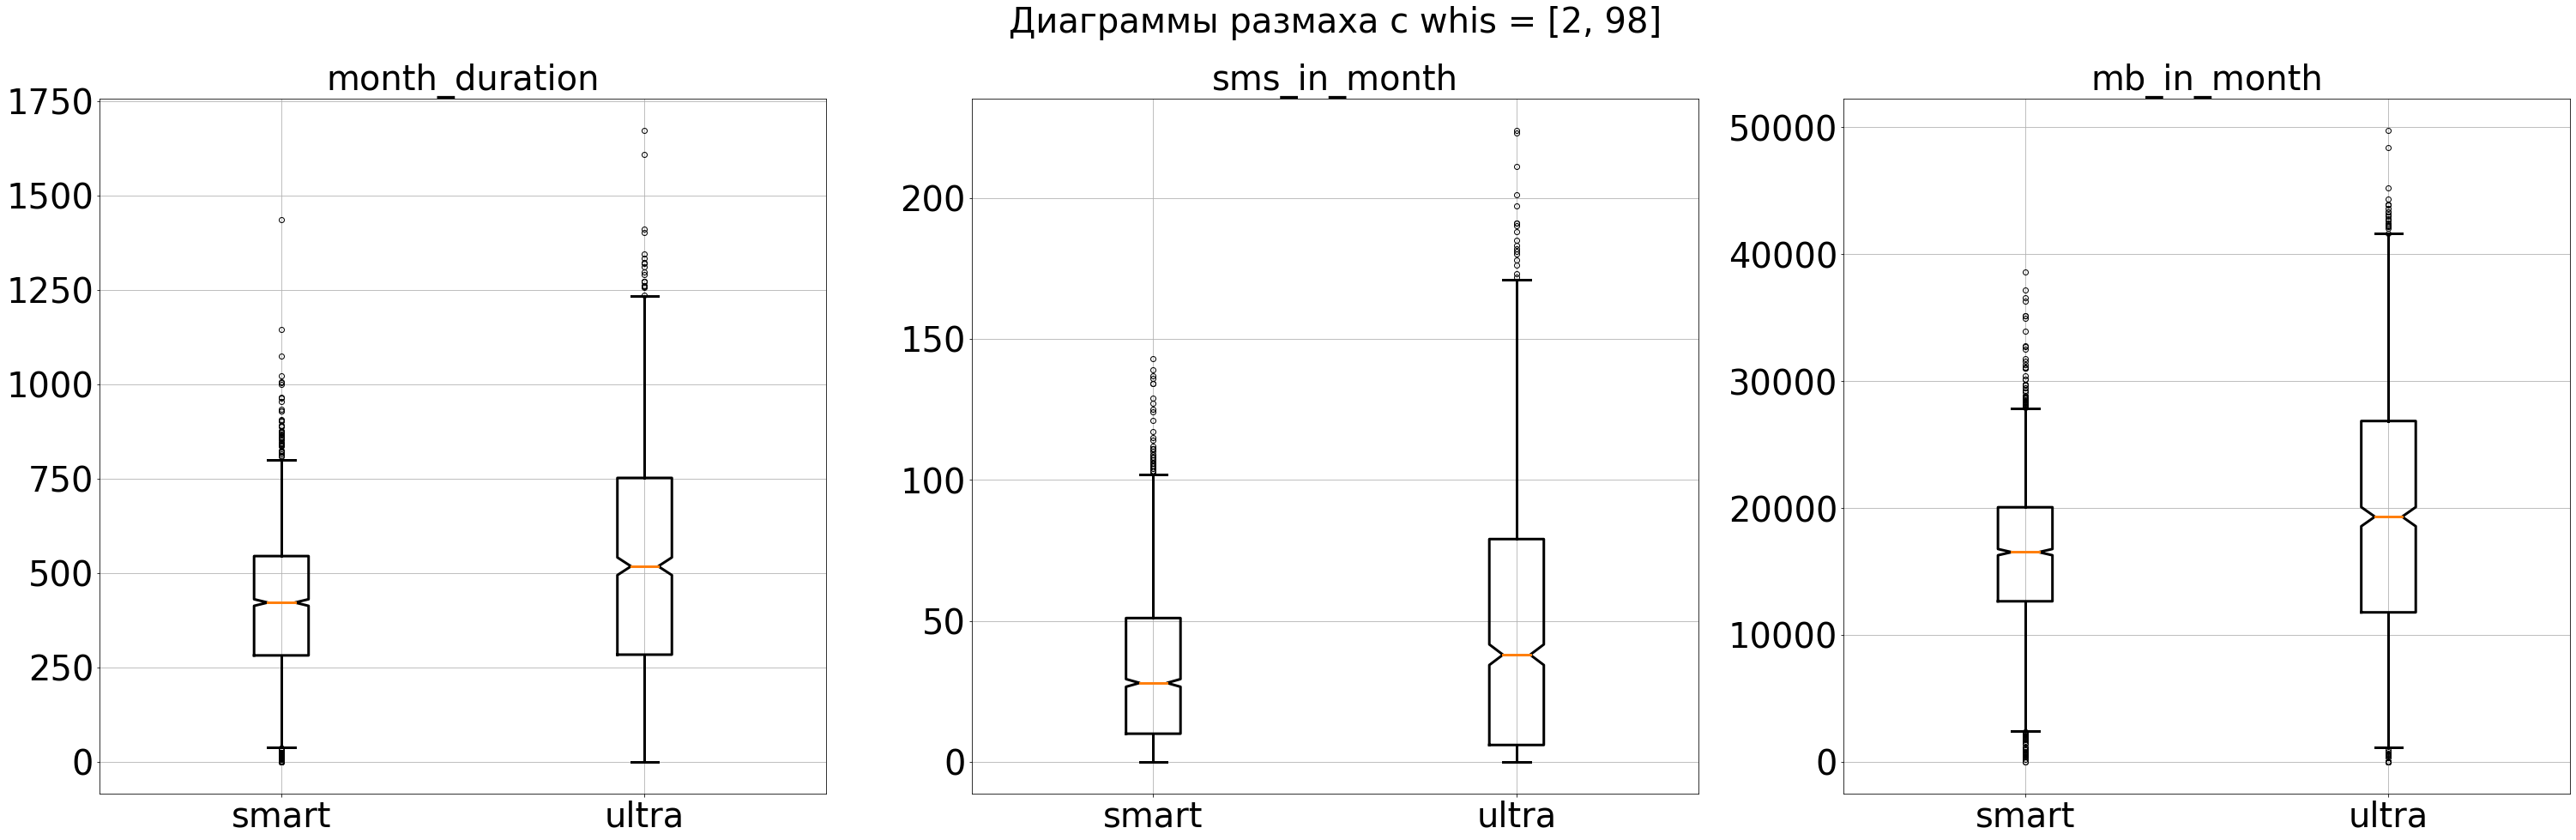

In [162]:
plot_box([2,98])

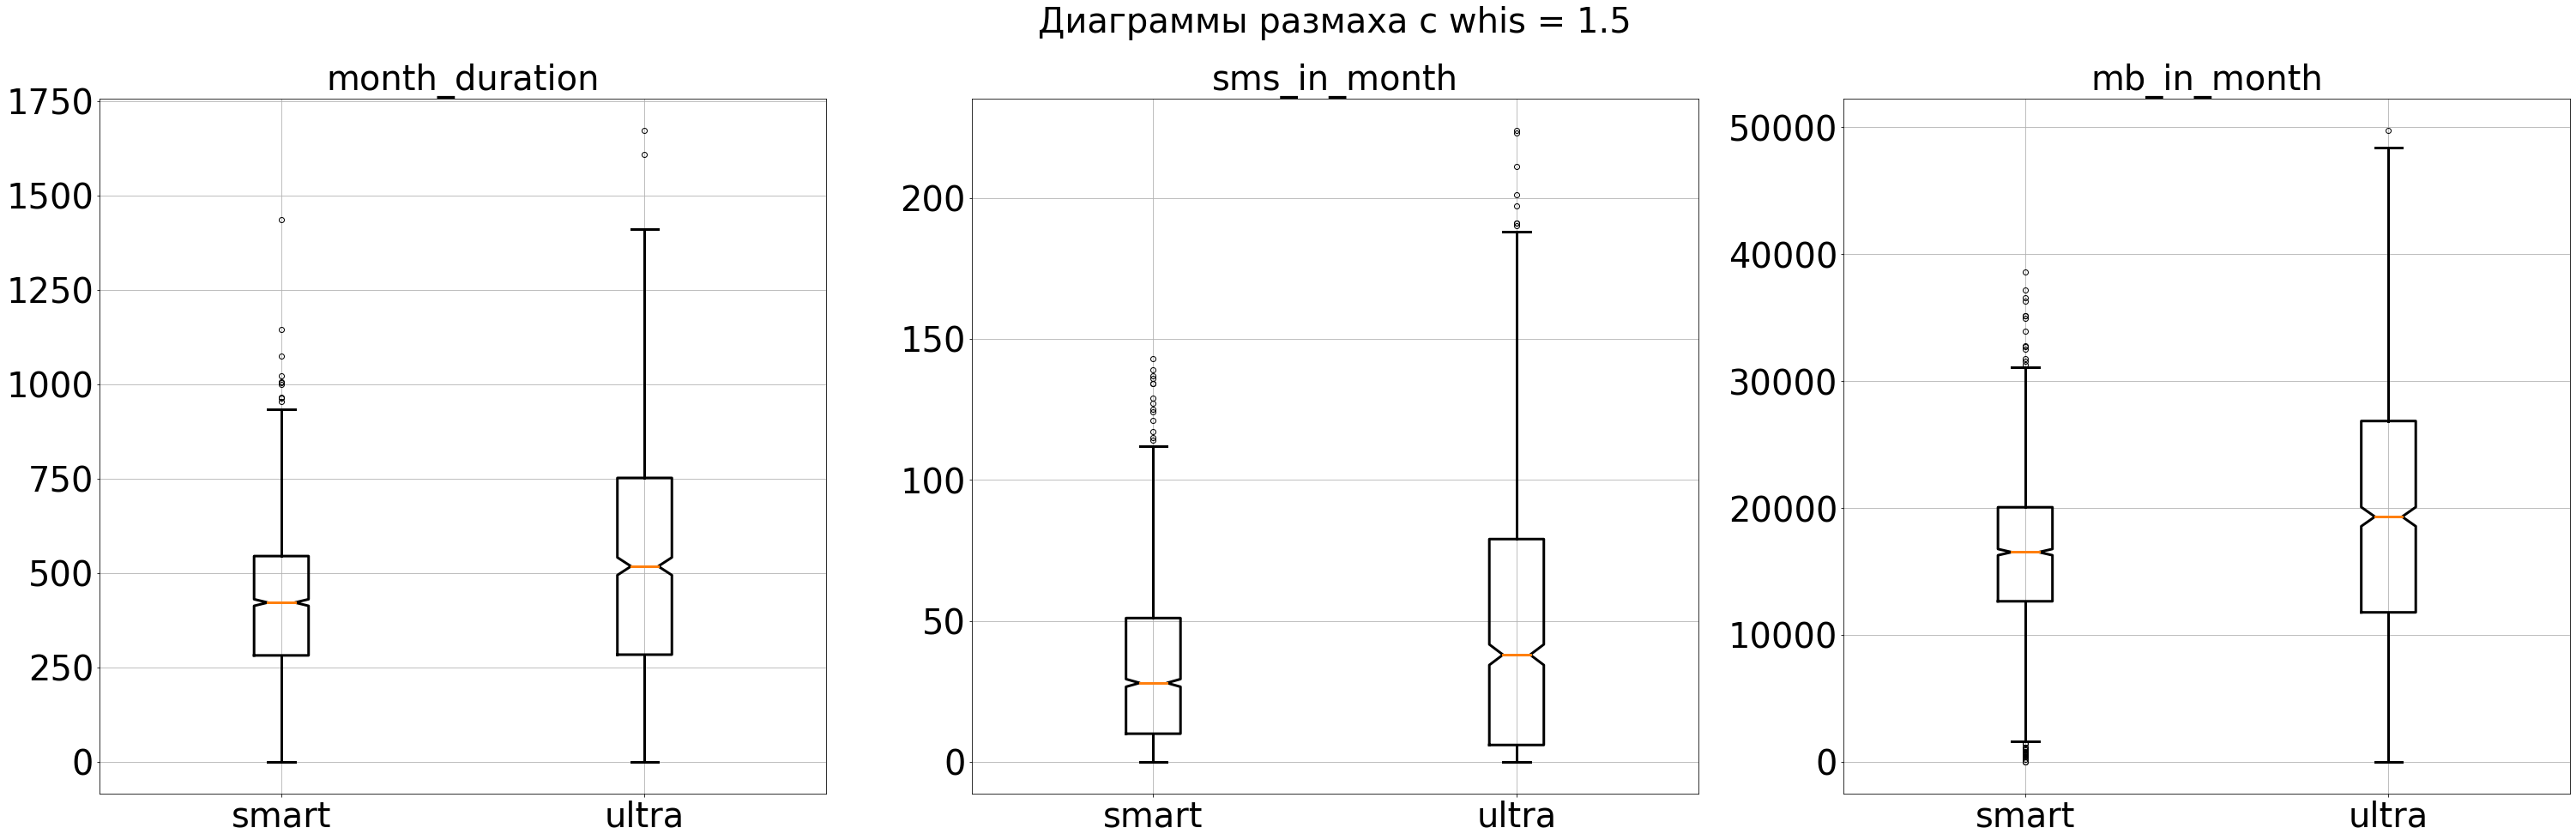

In [163]:
plot_box(1.5)

<span style=color:red><b>Определяем интервалы данных по диаграммам размаха как whis = 1.5</b></span>

___

### **Создание гистограмм и вывод описательных статистик**

<b>Формируем гистограммы для звонков, сообщений и интернет - траффика в месяц по тарифам. Выводим рассчетные данные по среднему, медиане, дисперсии и стандартному отклонению </b>

In [164]:
# Рассчетные данные по описательным статистикам
data.groupby('tariff')\
  .agg({'month_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Тариф "Смарт". Звонки в минутах в месяц')

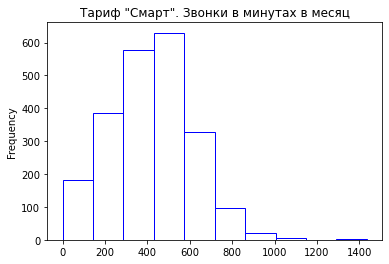

In [165]:
# Гистограмма длительности звонков в тарифе "Смарт"
data[data['tariff'] == 'smart']['month_duration'].plot(kind='hist', bins=10, ec='blue', color='white')
plt.title('Тариф "Смарт". Звонки в минутах в месяц')

Text(0.5, 1.0, 'Тариф "Ультра". Звонки в минутах в месяц')

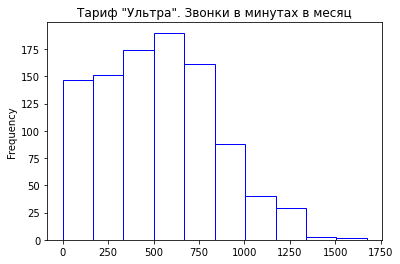

In [166]:
# Гистограмма длительности звонков в тарифе "Ультра"
data[data['tariff'] == 'ultra']['month_duration'].plot(kind='hist', bins=10, ec='blue', color='white')
plt.title('Тариф "Ультра". Звонки в минутах в месяц')

<span style=color:red><b>Промежуточный вывод:</b></span>
В среднем, пользователи тарифа "Ультра" говорят в месяц порядка 530 - 550 минут; пользователи тарифа "Смарт" - порядка 450 минут. Медиана и среднее лежат в аналогичных пределах.

___

In [167]:
# Рассчетные данные по описательным статистикам
data.groupby('tariff')\
  .agg({'sms_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Тариф "Смарт". Количество сообщений в месяц')

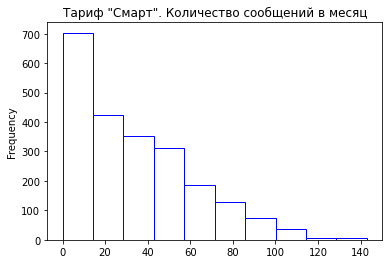

In [168]:
# Гистограмма количества сообщений в тарифе "Смарт"
data[data['tariff'] == 'smart']['sms_in_month'].plot(kind='hist', bins=10, ec='blue', color='white')
plt.title('Тариф "Смарт". Количество сообщений в месяц')

Text(0.5, 1.0, 'Тариф "Ультра". Количество сообщений в месяц')

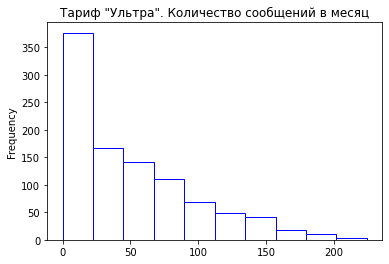

In [169]:
# Гистограмма количества сообщений в тарифе "Ультра"
data[data['tariff'] == 'ultra']['sms_in_month'].plot(kind='hist', bins=10, ec='blue', color='white')
plt.title('Тариф "Ультра". Количество сообщений в месяц')

<span style=color:red><b>Промежуточный вывод:</b></span>
Пользователи тарифа "Ультра" отправляют около 40 сообщений в месяц; пользователи тарифа "Смарт" - около 30 сообщений. Текстовые сообщения и в том, и в другом тарифе не являются популярной опцией.

___

In [170]:
# Рассчетные данные по описательным статистикам
data.groupby('tariff')\
  .agg({'mb_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Тариф "Смарт". Интернет-траффик в Мб в месяц')

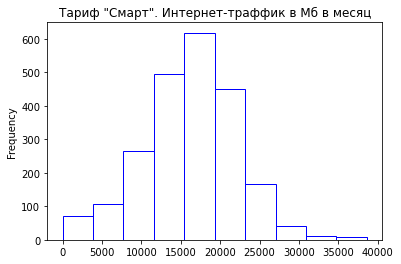

In [171]:
# Гистограмма интернет-траффика в тарифе "Смарт"
data[data['tariff'] == 'smart']['mb_in_month'].plot(kind='hist', bins=10, ec='blue', color='white')
plt.title('Тариф "Смарт". Интернет-траффик в Мб в месяц')

Text(0.5, 1.0, 'Тариф "Ультра". Интернет-траффик в Мб в месяц')

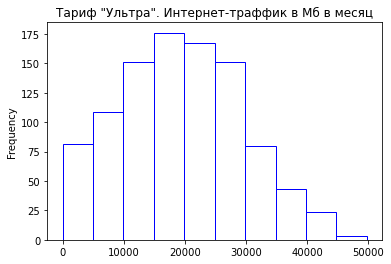

In [172]:
# Гистограмма интернет-траффика в тарифе "Ультра"
data[data['tariff'] == 'ultra']['mb_in_month'].plot(kind='hist', bins=10, ec='blue', color='white')
plt.title('Тариф "Ультра". Интернет-траффик в Мб в месяц')

<span style=color:red><b>Промежуточный вывод:</b></span>
Пользователи тарифа "Ультра" используют порядка 20 Гб траффика в месяц при лимите 30 Гб; пользователи тарифа "Смарт" при лимите 15 Гб, расходуют более 16 Гб трафика при лимите в 15 Гб.

___

<span style=color:red><b>Важно!</b></span>
<b>Данные диаграмм размаха с whis = 1.5 и данные гистограмм совпадают.</b>

___

### **Промежуточные выводы:**
- Пользователи тарифов "Ультра" и "Смарт" не выходят за пределы лимитов по длительности звонков в месяц. При этом пользователи тарифа "Смарт" практически исчерпывают лимит минут (450 минут при лимите 500)
- Пользователи тарифов одинаково мало пользуются опцией смс, по всей видимости, предпочитая общение в мессенджерах
- 15 Гб интернет-траффика, предоставляемых в тарифе "Смарт" не достаточно: пользователи данного тарифа расходуют порядка 16 Гб в месяц. Пользователи тарифа "Ультра", напротив, имеют запас в 10 Гб в среднем - из 30 Гб предоставляемого траффика ими используется лишь 20 Гб 

___

## *Этап 4. Проверка гипотез*

<span style=color:red><b>ВАЖНО:</b></span> поскольку выборки независимы, для проверки гипотезы можно использвать t-критерий Стьюдента.

<span style=color:red><b>ВАЖНО:</b></span> в данном исследовании не следует удалять выбросы, поскольку они могут иметь важное значение при проверке гипотез.

<span style=color:red><b>ВАЖНО:</b></span> необходимо определить значения параметра equal_var. Если дисперсии равны, параметр equal_var - True, если нет - False. 

### **Формулировка и проверка гипотезы 1**
- <b>НУЛЕВАЯ ГИПОТЕЗА:</b> средняя выручка пользователей тарифов «Ультра» и «Смарт» <b>НЕ РАЗЛИЧАЕТСЯ</b>
- <b>АЛЬТЕРНАТИВНАЯ ГИПОТЕЗА:</b> средняя выручка пользователей тарифов «Ультра» и «Смарт» <b>РАЗЛИЧАЕТСЯ</b>


___

In [173]:
ultra = data[data['tariff'] == 'ultra']
smart = data[data['tariff'] == 'smart']

In [174]:
smart = smart['revenue']
ultra = ultra['revenue']

In [175]:
np.var(smart)

620421.2682259914

In [176]:
np.var(ultra)

126931.63512587003

<span style=color:red>Значения дисперсий выборок отличаются практически в 5 раз, применяем equal_var=False</span>

In [177]:
alpha = .05

In [178]:
results = st.ttest_ind(ultra, smart, equal_var=False)

In [179]:
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза не работает")
else:
    print("Нулевая гипотеза работает")

p-value: 1.6205727991960766e-295
Нулевая гипотеза не работает


### **Промежуточный вывод:**
Нулевая гипотеза не работает. Средняя выручка пользователей тарифов «Ультра» и «Смарт» <span style=color:red><b>РАЗЛИЧАЕТСЯ</b></span>

___

### **Формулировка и проверка гипотезы 2**
- <b>НУЛЕВАЯ ГИПОТЕЗА:</b> средняя выручка пользователей из Москвы <b>НЕ ОТЛИЧАЕТСЯ</b> от выручки пользователей из других регионов
- <b>АЛЬТЕРНАТИВНАЯ ГИПОТЕЗА:</b> средняя выручка пользователей из Москвы <b>ОТЛИЧАЕТСЯ</b> от выручки пользователей из других регионов

In [180]:
data['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [181]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Провинция')

In [182]:
moscow = data[data['region'] == 'Москва']
province = data[data['region'] == 'Провинция']

In [183]:
moscow = moscow['revenue']
province = province['revenue']

In [184]:
np.var(moscow)

546428.4362840576

In [185]:
np.var(province)

630398.210245313

<span style=color:red>Значения дисперсий выборок отличаются, применяем equal_var=False</span>

In [186]:
alpha = .05

In [187]:
results = st.ttest_ind(moscow, province, equal_var=False)

In [188]:
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза не работает")
else:
    print("Нулевая гипотеза работает")

p-value: 0.4553974892423337
Нулевая гипотеза работает


### **Промежуточный вывод:**
Нулевая гипотеза работает. Средняя выручка пользователей из Москвы <span style=color:red><b>НЕ ОТЛИЧАЕТСЯ</b></span> от выручки пользователей из других регионов

___

<span style=color:red><b>Интересно, справедливо ли утверждение "В данном исследовании не следует удалять выбросы, поскольку они могут иметь важное значение при проверке гипотез"? Проверим!</b></span>

In [189]:
# Создаем фильтр для удаления выбросов
q_low = data['revenue'].quantile(0.25)
q_hi  = data['revenue'].quantile(0.94)

data_filtered = data[(data['revenue'] < q_hi) & (data['revenue'] > q_low)]

In [190]:
ultra = data_filtered[data_filtered['tariff'] == 'ultra']
smart = data_filtered[data_filtered['tariff'] == 'smart']

In [191]:
ultra = ultra['revenue']

In [192]:
smart = smart['revenue']

In [193]:
np.var(smart)

272628.17236604536

In [194]:
np.var(ultra)

11231.937450186653

In [195]:
alpha = .05

In [196]:
results = st.ttest_ind(ultra, smart, equal_var=False)

In [197]:
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза не работает")
else:
    print("Нулевая гипотеза работает")

p-value: 4.0988057206839514e-204
Нулевая гипотеза не работает


___

In [198]:
data_filtered['region'] = np.where(data_filtered['city'] == 'Москва', 'Москва', 'Провинция')

In [199]:
moscow = data_filtered[data_filtered['region'] == 'Москва']
province = data_filtered[data_filtered['region'] == 'Провинция']

In [200]:
moscow = moscow['revenue']

In [201]:
province = province['revenue']

In [202]:
np.var(moscow)

211509.68684898803

In [203]:
np.var(province)

240180.71529126845

In [204]:
alpha = .05

In [205]:
results = st.ttest_ind(moscow, province, equal_var=False)

In [206]:
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза не работает")
else:
    print("Нулевая гипотеза работает")

p-value: 0.3785893230423544
Нулевая гипотеза работает


<span style=color:red><b>ЗАКЛЮЧЕНИЕ:</b></span>
Удаление выбросов в данном датасете действительно не нужно: стандартное "отсечение" по квартилям 0.25 и 0.75 приводит к удалению большого объема актуальных данных. Опытным путем (подбором значений квантилей 0.25 и 0.94) удалось добиться корректных результатов для проверки гипотез. При этом сохранялось корректное значение equal_var=False

## *Этап 5. Общий вывод*

<b>ПРОВЕДЕННОЕ ИССЛЕДОВАНИЕ ВЫЯВИЛО СЛЕДУЮЩИЕ ЗАКОНОМЕРНОСТИ:</b>

ЧЕРТЫ СХОДСТВА ТАРИФНЫХ ПЛАНОВ "СМАРТ" И "УЛЬТРА":
- Пользователи обоих тарифных планов главным образом используют звонки и пакеты интернет-траффика
- Пользователи обоих планов практически не используют опцию "смс"

ЧЕРТЫ РАЗЛИЧИЯ ТАРИФНЫХ ПЛАНОВ "СМАРТ" И "УЛЬТРА":
- Пользователи тарифного плана "Смарт" практически исчерпывают лимит минут разговора и часто выходят за границы лимита пакета интернета (16 Гб при лимите 15 Гб)
- План "Ультра" предоставляет пользователям 30 Гб интернета в месяц из которых большинство использует только 20 Гб

ПРОВЕРКА ГИПОТЕЗ ПОКАЗАЛА:
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается (нулевая гипотеза отвергается)
- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов (нулевая гипотеза подиверждается)

<span style=color:red>Тариф "Ультра", безусловно более прибыльный, чем тариф "Смарт" (1950 руб. против 550 руб). Однако, анализ выявил явный дисбаланс в тарифных планах.</span> 

РЕКОМЕНДАЦИИ ПО ИЗМЕНЕНИЮ ТАРИФНЫХ ПЛАНОВ:
- Снизить число смс до минимума в обоих планах (даже в тарифе "Смарт" пользователи не выбирают лимит сообщений в месяц)
- Увеличить пакет интернет-траффика в тарифе "Смарт" до 20 Гб
- Предолжить пользователям дополнительную услугу "бесплатные интернет - мессенджеры": за счет этой опции можно существенно увеличить долю пользователей тарифа "Смарт" и увеличить общую прибыль


